In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-data/Customers.csv


# The dataset contains data about customers from one of the retail stores. The dataset includes data about Gender, Age, Annual Income, Spending score, Profession, Work Experience, Family size about data
## The Key Point Indicator from the dataset is Spending Score

In [2]:
cust = pd.read_csv("/kaggle/input/customer-data/Customers.csv")
cust

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


#### The columns - 'Annual Income ($)' and 'Spending Score (1-100)' becomes difficult to call everytime. Hence we rename those columns

In [3]:
cust = cust.rename(columns={'Annual Income ($)':'Annual Income','Spending Score (1-100)':'Spending Score'})
cust

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Annual Income    2000 non-null   int64 
 4   Spending Score   2000 non-null   int64 
 5   Profession       1965 non-null   object
 6   Work Experience  2000 non-null   int64 
 7   Family Size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


#### It could be seen that there are 35 Null entries in the 'Profession' column
#### Let's see if any outliers are present in numerical data

In [5]:
cust.describe()

,CustomerID,Age,Annual Income,Spending Score,Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


#### From the above aggregate data, it could be concluded that there are no null values in any of the numerical data.
#### However, there are few outliers in the data such as minimum age is 0 (which technically isn't possible) and Annual income being 0 and such things

In [6]:
wrong_age = cust[cust['Age']<20]
wrong_age

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
33,34,Male,18,62000,92,Homemaker,9,7
61,62,Male,19,50000,55,Artist,9,2
65,66,Male,18,9000,59,Entertainment,0,2
68,69,Male,19,81000,59,Artist,0,4
...,...,...,...,...,...,...,...,...
1979,1980,Male,0,165321,93,Doctor,8,1
1980,1981,Female,10,86925,76,Artist,7,2
1984,1985,Female,2,153622,51,Lawyer,6,6
1986,1987,Female,4,68094,61,Doctor,4,7


#### From the above analysis, it could be seen that there's lot of inaccurate data like Age being 0-5 years and experience being 7-10 years
#### The goal is to clean the data  by removing inaccurate data as well as filling the Null entries in 'Profession' column with appropriate conditions for both data cleaning scenarios

#### Let's define a function for different scenarios and clean the data accordingly

In [7]:
def correct_age(row):
    if row["Age"] >= 15 and row["Age"] <= 20 and row["Work Experience"] > 3:
        row["Age"] += row["Work Experience"] + 5
    elif row["Age"] >= 10 and row["Age"] < 15 and row["Work Experience"] > 1:
        row["Age"] += row["Work Experience"] + 10
    elif row["Age"] >= 0 and row["Age"] < 5:
        row["Age"] += 5
    elif row["Age"] >= 5 and row["Age"] < 10 and row["Work Experience"] > 0:
        row["Age"] += row["Work Experience"] + 15
    return row

# Apply the age correction function to each row in the DataFrame
cust = cust.apply(correct_age, axis=1)

# Define a function to fill the null values in the Profession column based on the specified conditions
def fill_profession(row):
    if pd.isnull(row["Profession"]):
        if row["Annual Income"] > 100000:
            row["Profession"] = "Doctor"
        elif row["Annual Income"] >= 70000 and row["Annual Income"] <= 100000:
            row["Profession"] = "Engineer"
        elif row["Annual Income"] >= 40000 and row["Annual Income"] < 70000:
            row["Profession"] = "Healthcare"
        else:
            row["Profession"] = "Artist"
    return row

# Apply the profession filling function to each row in the DataFrame
cust = cust.apply(fill_profession, axis=1)
cust

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Annual Income    2000 non-null   int64 
 4   Spending Score   2000 non-null   int64 
 5   Profession       2000 non-null   object
 6   Work Experience  2000 non-null   int64 
 7   Family Size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [9]:
cust.describe()

,CustomerID,Age,Annual Income,Spending Score,Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,50.857500,110731.821500,50.962500,4.102500,3.768500
std,577.494589,26.240893,45739.536688,27.934661,3.922204,1.970749
min,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,29.750000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [11]:
wrong_income = cust[cust['Annual Income']<20]
wrong_income

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
169,170,Male,32,0,63,Artist,2,2
246,247,Male,23,0,96,Doctor,1,3


#### There are 2 entries with Annual Income as 0. Let's replace them with appropriate number

In [12]:
cust['Annual Income'].replace(0,45000, inplace=True)
cust

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [13]:
wrong_income = cust[cust['Annual Income']<20]
wrong_income

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size


In [14]:
wrong_exp = cust[cust['Work Experience']<1]
wrong_exp

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
3,4,Female,23,59000,77,Lawyer,0,2
5,6,Female,22,58000,76,Artist,0,2
8,9,Male,64,97000,3,Engineer,0,3
12,13,Female,58,80000,15,Executive,0,5
14,15,Male,37,19000,13,Doctor,0,1
...,...,...,...,...,...,...,...,...
1887,1888,Female,77,124995,66,Healthcare,0,1
1890,1891,Female,6,130089,67,Artist,0,5
1893,1894,Female,68,173047,17,Healthcare,0,3
1894,1895,Female,39,61298,91,Artist,0,5


#### Almost quarter dataset has Work Experience as 0 which would be difficult to derive better insights. Let's fill the data with appropriate data for analyzing further

In [18]:
def work_exp(row):
    if row['Work Experience']==0:
        if row['Age'] > 20:
            row['Work Experience'] = row['Age'] - 20
        elif row['Age'] <= 20:
            row['Work Experience'] = 5
    return row

cust = cust.apply(work_exp, axis=1)
cust

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,3,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [19]:
cust.describe()

,CustomerID,Age,Annual Income,Spending Score,Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,50.857500,110776.821500,50.962500,11.32850,3.768500
std,577.494589,26.240893,45652.583214,27.934661,16.67389,1.970749
min,1.000000,5.000000,1000.000000,0.000000,1.00000,1.000000
25%,500.750000,29.750000,74572.000000,28.000000,2.00000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,6.00000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,9.00000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,79.00000,9.000000


#### The data in the dataset seems to be cleaned and ready for analyzing purpose to derive insights

#### Since Spending Score is out KPI, we will check which metrics impact our KPI so that we could target those customers and develop new methodologies for new customers or existing customers

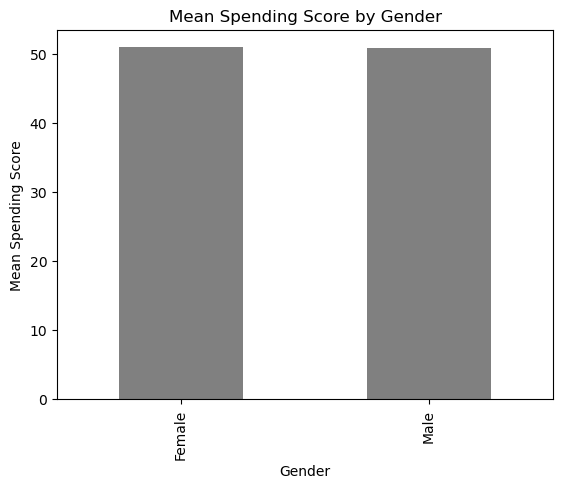

In [34]:
import matplotlib.pyplot as plt
mean_spending_by_gender = cust.groupby("Gender")["Spending Score"].mean()

# Plot a bar chart of the mean Spending Score by Gender
mean_spending_by_gender.plot(kind="bar", color = 'grey')
plt.xlabel("Gender")
plt.ylabel("Mean Spending Score")
plt.title("Mean Spending Score by Gender")
plt.show()

#### The Gender metric doesn't have any impact on the Spending Score

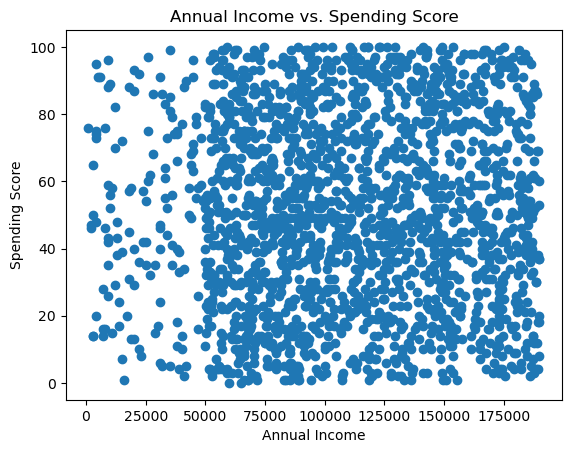

In [27]:
plt.scatter(cust["Annual Income"], cust["Spending Score"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income vs. Spending Score")
plt.show()

#### Customers with Annual Income more than 50000 seems to be having good Spending Score

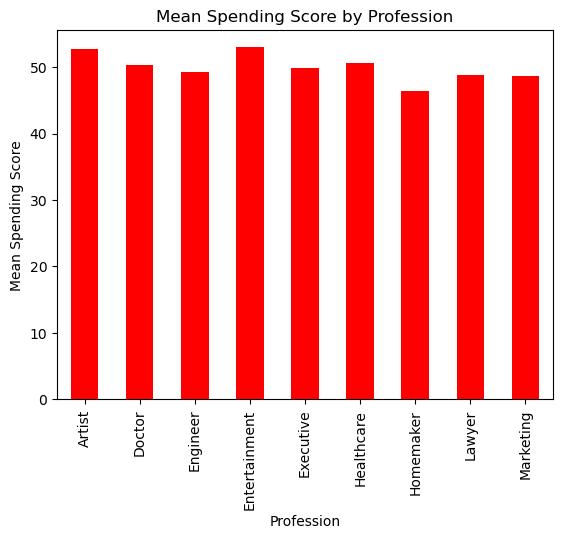

In [32]:
mean_spending_by_profession = cust.groupby("Profession")["Spending Score"].mean()
mean_spending_by_profession.plot(kind="bar", color = 'red')
plt.xlabel("Profession")
plt.ylabel("Mean Spending Score")
plt.title("Mean Spending Score by Profession")
plt.show()

#### Customers from Entertainment, Artist, Healthcare are on the highest Spending Score while from Homemaker and Marketing in lower side, even though the difference is minimal

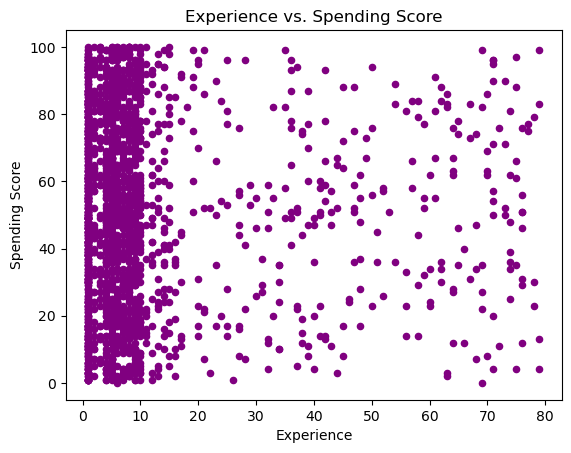

In [33]:
cust.plot(x="Work Experience", y="Spending Score", kind="scatter", color = 'purple')
plt.xlabel("Experience")
plt.ylabel("Spending Score")
plt.title("Experience vs. Spending Score")
plt.show()

#### Customers who are relatively early in their profession - 1 to 10 years of experience are having most Spending Scores